In [1]:
import pandas as pd
import survival

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
altered = pd.read_csv("Altered.txt", sep = "\t")
unaltered = pd.read_csv("Unaletered.txt", sep = "\t")

In [3]:
altered["Status"] = altered["Status"].map(dict(censored=0, deceased=1))

unaltered["Status"] = unaltered["Status"].map(dict(censored=0, deceased=1))


In [6]:
from lifelines import KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts
kmf = KaplanMeierFitter()

In [8]:
from lifelines.statistics import logrank_test

results = logrank_test(altered["Time (months)"], unaltered["Time (months)"], event_observed_A=altered["Status"], event_observed_B = unaltered["Status"])
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           6.50 0.01      6.54

In [9]:
print(results.p_value)

0.010763375980613398


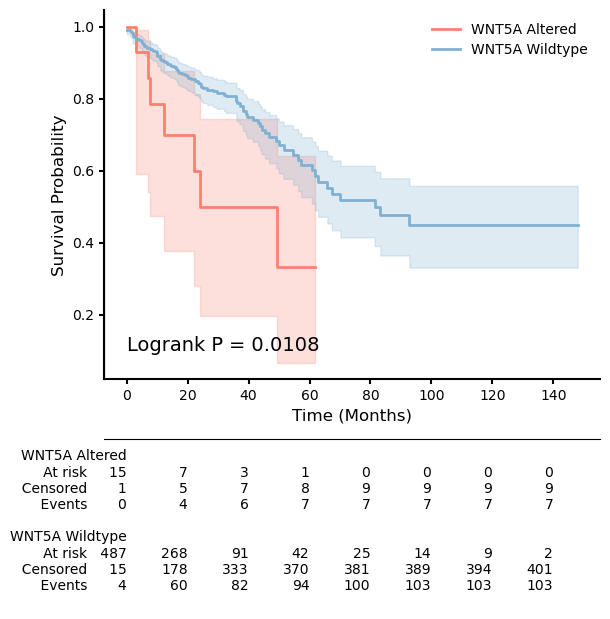

In [5]:
ax = plt.subplot(111)

kmf_mut = KaplanMeierFitter()
ax = kmf_mut.fit(altered["Time (months)"]
                  , event_observed = altered["Status"]
                  , label = "WNT5A Altered").plot_survival_function(ax=ax, color = sns.color_palette("Set3")[3], linewidth = 2, show_censors = False)

kmf_wt = KaplanMeierFitter()
ax = kmf_wt.fit(unaltered["Time (months)"]
                  , event_observed = unaltered["Status"]
                  , label = "WNT5A Wildtype").plot_survival_function(ax=ax, color = sns.color_palette("Set3")[4], linewidth = 2, show_censors = False)

add_at_risk_counts(kmf_mut, kmf_wt, ax=ax)

ax.set_ylabel("Survival Probability", size = 12)
ax.set_xlabel("Time (Months)", size = 12)
ax.legend(frameon=False)

ax.annotate("Logrank P = 0.0108", (0, 0.1), size = 14)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.tick_params(width=1.5)

sns.despine()

plt.savefig("Survival_WNT5A_COADREAD_TCGA_v1.pdf", bbox_inches = "tight")
